In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family = 'serif')
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}

In [3]:
def scale(data, volt_range):
    """
    Rescales sampler data.
    
    Parameters:
    data (array) : data to be rescaled
    volt_range (double) : volt range input parameter 
    
    Returns:
    output (array) : rescaled data
    """
    
    output = (data * volt_range) / np.power(2, 15) / 2 # factor of 2
    return output

def load(filename, volt_range, nblocks, nsamples = 16000):
    """
    Loads a file with collected data. 
    
    Parameters:
    filename (string) : name of the file
    volt_range (double) : volt range input parameter
    nblocks (int) : number of data blocks
    
    Returns:
    complex (array) : rescaled data, split by block
    real (array) : real component
    imag (array) : imaginary component
    """
    
    data = np.load(filename)
    scaled = scale(data, volt_range)
    split = np.split(scaled, 2)
    real = split[0]
    imag = split[1]
    real_split = np.split(real, nblocks)
    imag_split = np.split(imag, nblocks)
    output = []
    for i in range(0, nblocks):
        output.append(real_split[i] + 1j * imag_split[i])
    return output, real, imag

def get_pwr(signal, v_samp, nsamples):
    """
    Returns the power spectrum of a given signal as a function of frequency.
    
    Parameters:
    signal (array) : signal data
    v_samp (double) : sampling frequency
    nsamples (int) : number of samples per block
    
    Returns: 
    power (array) : power spectrum
    freqs (array) : frequencies
    """
    
    nblocks = len(signal)
    power = []
    for i in range(0, nblocks):
        ft = np.fft.fft(signal[i])
        power.append(np.abs(ft) ** 2)
    dt = 1 / v_samp
    freqs = np.fft.fftfreq(nsamples, d = dt)
    
    return freqs, power

def avg_smooth(data, freqs, nsmooth):
    """
    Smooths data by taking averages over bins of a specified size.
    
    Parameters:
    data (array) : data to be smoothed
    freqs (array) : frequencies
    nsmooth (int) : number of bins
    """
    
    data_split = np.split(data, nsmooth)
    freqs_split = np.split(freqs, nsmooth)
    data_smooth = []
    freqs_smooth = []
    for i in range(0, nsmooth):
        data_smooth.append(np.mean(data_split[i], axis = 0))
        freqs_smooth.append(np.mean(freqs_split[i], axis = 0))
    return data_smooth, freqs_smooth

def med_smooth(data, freqs, nsmooth):
    """
    Smooths data by taking means over bins of a specified size.
    
    Parameters:
    data (array) : data to be smoothed
    freqs (array) : frequencies
    nsmooth (int) : number of bins
    """
    
    data_split = np.split(data, nsmooth)
    freqs_split = np.split(freqs, nsmooth)
    data_smooth = []
    freqs_smooth = []
    for i in range(0, nsmooth):
        data_smooth.append(np.median(data_split[i], axis = 0))
        freqs_smooth.append(np.median(freqs_split[i], axis = 0))
    return data_smooth, freqs_smooth

# Sample histogram

In [4]:
# TEST DATA
# filename = './data/noisedatagood2_200mV_lab2.npy'

In [5]:
filename = '/test_50mV.npy'
v_range = 0.05
nblocks = 99
nsamples = 16000
data, real, imag = load(filename, v_range, nblocks)

fig = plt.figure(figsize = (6, 4))
plt.hist(real, bins = 51)
plt.xlabel('Voltage (V)')
plt.ylabel('Counts')
plt.title('Sample Histogram')
fig.tight_layout()
plt.savefig('histogram.pdf', dpi = 1200)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/test_50mV.npy'

Note: We changed the amplitude of the first L.O. from -127.0 dBm to 20.0 dBm.

# Test signal 

In [ ]:
# TEST DATA
# filename = './data/gooddata_100mV_lab2.npy'

In [9]:
upper_file = '1MHz_above.npy'
lower_file = '1MHz_below.npy'

div = 5.
v_samp = 62.5 / div
v_range = 0.05
nsamples = 16000
nblocks = 99

data, real, imag = load(upper_file, v_range, nblocks)
freqs, power = get_pwr(data, v_samp, nsamples)
avg_upper = np.mean(power, axis = 0)

data, real, imag = load(lower_file, v_range, nblocks)
freqs, power = get_pwr(data, v_samp, nsamples)
avg_lower = np.mean(power, axis = 0)

fig = plt.figure(figsize = (8, 8))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(-np.fft.fftshift(freqs), np.fft.fftshift(avg_upper))
ax1.set_xlabel('Frequency (MHz)')
ax1.set_ylabel('Power (V$^2\cdot\mu$s$^2$)')
ax1.set_title('Test signal (upper sideband)')
ax1.set_xlim(-2, 2)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(-np.fft.fftshift(freqs), np.fft.fftshift(avg_lower))
ax2.set_xlabel('Frequency (MHz)')
ax2.set_ylabel('Power (V$^2\cdot\mu$s$^2$)')
ax2.set_title('Test signal (lower sideband)')
ax2.set_xlim(-2, 2)

fig.tight_layout()
plt.savefig('test_signal.pdf', dpi = 1200)

OSError: [Errno 2] No such file or directory: 'latex'

Error in callback <function post_execute at 0x1160237d0> (for post_execute):


OSError: [Errno 2] No such file or directory: 'latex'

OSError: [Errno 2] No such file or directory: 'latex'

<Figure size 576x576 with 2 Axes>

# On-line and off-line spectra

In [87]:
# TEST DATA
# filename = './data/online_upperhalf_200mV_cat_lab2.npy'

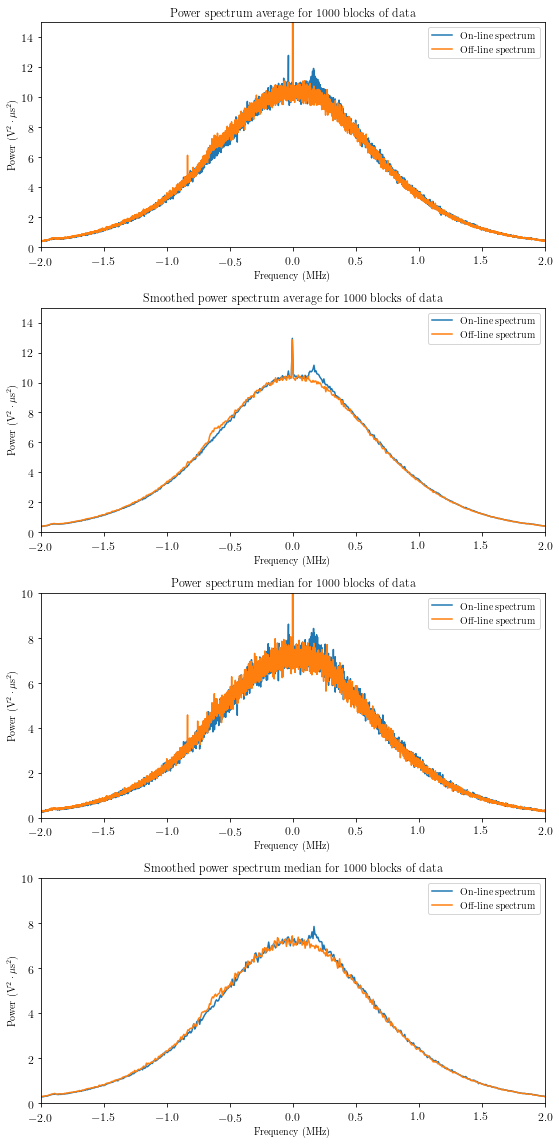

In [130]:
on_file = './data/online.npy'
off_file = './data/offline.npy'

div = 5
v_samp = 62.5 / div
v_range = 0.05
nsamples = 16000
nblocks = 1000

data, real, imag = load(on_file, v_range, nblocks)
freqs_on, power = get_pwr(data, v_samp, nsamples)
avg_on = np.mean(power, axis = 0)
med_on = np.median(power, axis = 0)

data, real, imag = load(off_file, v_range, nblocks)
freqs_off, power = get_pwr(data, v_samp, nsamples)
avg_off = np.mean(power, axis = 0)
med_off = np.median(power, axis = 0)

smooth_div = 10
nsmooth = nsamples // smooth_div
smooth_avg_on, smooth_freqs_on = avg_smooth(avg_on, freqs_on, nsmooth)
smooth_avg_off, smooth_freqs_off = avg_smooth(avg_off, freqs_off, nsmooth)
smooth_med_on, med_freqs_on = med_smooth(med_on, freqs_on, nsmooth)
smooth_med_off, med_freqs_off = med_smooth(med_off, freqs_off, nsmooth)

fig = plt.figure(figsize = (8, 16))

ax1 = plt.subplot(4, 1, 1)
ax1.plot(-np.fft.fftshift(freqs_on), np.fft.fftshift(avg_on), label = 'On-line spectrum')
ax1.plot(-np.fft.fftshift(freqs_off), np.fft.fftshift(avg_off), label = 'Off-line spectrum')
ax1.legend(loc = 'upper right')
ax1.set_xlim(-2, 2)
ax1.set_ylim(0, 15)
ax1.set_xlabel('Frequency (MHz)')
ax1.set_ylabel('Power (V$^2\cdot\mu$s$^2$)')
ax1.set_title('Power spectrum average for 1000 blocks of data')

ax2 = plt.subplot(4, 1, 2)
ax2.plot(-np.fft.fftshift(smooth_freqs_on), np.fft.fftshift(smooth_avg_on), label = 'On-line spectrum')
ax2.plot(-np.fft.fftshift(smooth_freqs_off), np.fft.fftshift(smooth_avg_off), label = 'Off-line spectrum')
ax2.legend(loc = 'upper right')
ax2.set_xlim(-2, 2)
ax2.set_ylim(0, 15)
ax2.set_xlabel('Frequency (MHz)')
ax2.set_ylabel('Power (V$^2\cdot\mu$s$^2$)')
ax2.set_title('Smoothed power spectrum average for 1000 blocks of data')

ax3 = plt.subplot(4, 1, 3)
ax3.plot(-np.fft.fftshift(freqs_on), np.fft.fftshift(med_on), label = 'On-line spectrum')
ax3.plot(-np.fft.fftshift(freqs_off), np.fft.fftshift(med_off), label = 'Off-line spectrum')
ax3.legend(loc = 'upper right')
ax3.set_xlim(-2, 2)
ax3.set_ylim(0, 10)
ax3.set_xlabel('Frequency (MHz)')
ax3.set_ylabel('Power (V$^2\cdot\mu$s$^2$)')
ax3.set_title('Power spectrum median for 1000 blocks of data')

ax4 = plt.subplot(4, 1, 4)
ax4.plot(-np.fft.fftshift(med_freqs_on), np.fft.fftshift(smooth_med_on), label = 'On-line spectrum')
ax4.plot(-np.fft.fftshift(med_freqs_off), np.fft.fftshift(smooth_med_off), label = 'Off-line spectrum')
ax4.legend(loc = 'upper right')
ax4.set_xlim(-2, 2)
ax4.set_ylim(0, 10)
ax4.set_xlabel('Frequency (MHz)')
ax4.set_ylabel('Power (V$^2\cdot\mu$s$^2$)')
ax4.set_title('Smoothed power spectrum median for 1000 blocks of data')

fig.tight_layout()
plt.savefig('lines.pdf', dpi = 1200)

# Calibration

In [44]:
# TEST DATA
# filename'./data/offline_lowerhalf_200mV_cat_lab2.npy'

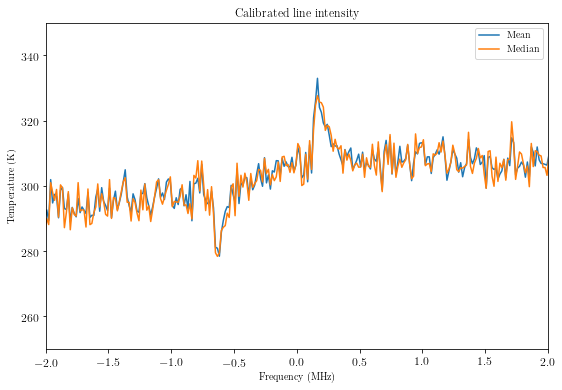

G = 304.2228435837575


<Figure size 432x288 with 0 Axes>

In [140]:
cal_file = './data/cal_data_100mV.npy'
cold_file = './data/cold_data_100mV.npy'

v_samp = 12.5
v_range = 0.1
nsamples = 16000
nblocks = 99

cold, real, imag = load(cold_file, v_range, nblocks)
cal, real, imag = load(cal_file, v_range, nblocks)
cold_freqs, cold_pwr = get_pwr(cold, v_samp, nsamples)
cal_freqs, cal_pwr = get_pwr(cal, v_samp, nsamples)
avg_cold = np.mean(cold_pwr, axis = 0)
avg_cal = np.mean(cal_pwr, axis = 0)

avg_line = np.asarray(avg_on) / np.asarray(avg_off)

gain = 300 * np.sum(avg_cold) / np.sum(avg_cal - avg_cold)
final = gain * avg_line

smooth_div = 20
nsmooth = nsamples // smooth_div
smooth_avg, avg_freqs = avg_smooth(final, cold_freqs, nsmooth)
smooth_med, med_freqs = med_smooth(final, cold_freqs, nsmooth)

fig = plt.figure(figsize = (9, 6))
plt.plot(-np.fft.fftshift(avg_freqs), np.fft.fftshift(smooth_avg), label = 'Mean')
plt.plot(-np.fft.fftshift(med_freqs), np.fft.fftshift(smooth_med), label = 'Median')
plt.xlim(-2, 2)
plt.ylim(250, 350)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated line intensity')
plt.legend()
plt.show()
fig.tight_layout()
plt.savefig('line_intensity.pdf', dpi = 1200)
print('G =', gain)